# [учебная задача]

# Выбор локации для скважины

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from numpy.random import RandomState
from scipy import stats as st

In [2]:
df0 = pd.read_csv('geo_data_0.csv')
df1 = pd.read_csv('geo_data_1.csv')
df2 = pd.read_csv('geo_data_2.csv')

### Описание данных
<p> id — уникальный идентификатор скважины;
<p> f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
<p> product — объём запасов в скважине (тыс. баррелей).

In [3]:
# Порядок действий (функции see()):
# Уточним размер таблицы данных
# Уточним количество уникальных id скважин
# Уточним названия столбцов
# Уточним типы данных
# Посмотрим на данные
# Для более полного описания "разлета" значений воспользуемся методом describe()

def see(df):
    print(df.shape)
    print()
    print(pd.DataFrame(list(df0['id'].unique()))[0].count(), '- уникальных ID')
    print()
    print(df.columns)
    print()
    print(df.info())
    display(df.head())
    display(df.describe())
    print('----------------------------------------------------')

def see_list(A):
    for x in A:  
        see(x) # вызов функции rmse

In [4]:
df = [df0, df1, df2]
see_list(df)

(100000, 5)

99990 - уникальных ID

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


----------------------------------------------------
(100000, 5)

99990 - уникальных ID

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


----------------------------------------------------
(100000, 5)

99990 - уникальных ID

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


----------------------------------------------------


In [5]:
print('Объем запасов в источнике geo_data_0 - {:.0f}'.format(df0['product'].sum()),' (тыс. баррелей)')
print('Объем запасов в источнике geo_data_1 - {:.0f}'.format(df1['product'].sum()),' (тыс. баррелей)')
print('Объем запасов в источнике geo_data_2 - {:.0f}'.format(df2['product'].sum()),' (тыс. баррелей)')

Объем запасов в источнике geo_data_0 - 9250000  (тыс. баррелей)
Объем запасов в источнике geo_data_1 - 6882500  (тыс. баррелей)
Объем запасов в источнике geo_data_2 - 9500000  (тыс. баррелей)


<b> Выводы:
<p> Типы данных не требуется менять.
<p> Переименновывать столбцы не требуется
<p> Пропуски в данных отсутствуют
<p> Прямое кодирование и масштабирование признаков не требуется
<p> Категориальный признак id не несет в себе полезных значений для обучения модели, поэтому исключим id.
<p> product = target
<p> f0, f1, f2 = features
<hr> Данных много, поэтому нужен графический анализ данных

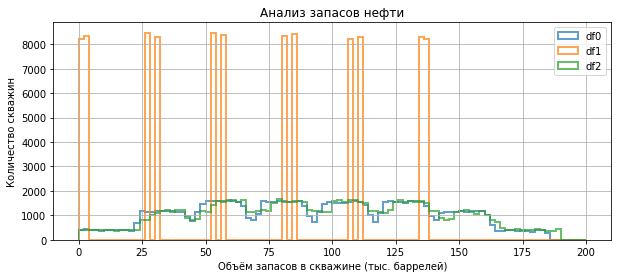

In [6]:
ax = df0.sort_values(by='product', ascending=False).plot(
    kind='hist',
    y='product',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='df0',
)
df1.sort_values(by='product', ascending=False).plot(
    kind='hist',
    y='product',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='df1',
    ax=ax,
)

df2.sort_values(by='product', ascending=False).plot(
    kind='hist',
    y='product',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='df2',
    ax=ax,
    grid=True,
    legend=True,
    figsize = (10,4)
);
plt.title('Анализ запасов нефти')
plt.xlabel('Объём запасов в скважине (тыс. баррелей)')
plt.ylabel("Количество скважин");

Судя по разпределению значений df1 далёк от нормального распределения.
<p> Попробуем сгруппировать значений "по убыванию" и построить график еще раз.

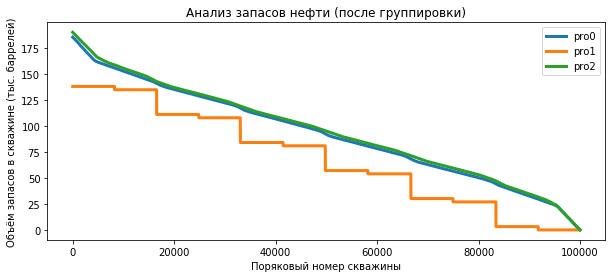

In [7]:
pro_df = pd.DataFrame()
pro_df['pro0'] = df0.sort_values(by='product', ascending=False)['product'].reset_index(drop=True)
pro_df['pro1'] = df1.sort_values(by='product', ascending=False)['product'].reset_index(drop=True)
pro_df['pro2'] = df2.sort_values(by='product', ascending=False)['product'].reset_index(drop=True)

pro_df.reset_index().plot(x='index', y=['pro0', 'pro1', 'pro2'], linewidth=3, figsize = (10,4))
plt.title('Анализ запасов нефти (после группировки)')
plt.xlabel('Поряковый номер скважины')
plt.ylabel('Объём запасов в скважине (тыс. баррелей)');
plt.show()

<b>Вывод:
<p> Про качество нефти здесь нет возможности говорить, но по объему запасов лидирует источник geo_data_2.csv.
<p> Источник geo_data_1.csv содержит данные о сильно похожих друг на друга скважинах, как-будто они искусственно созданы человеком (по ГОСТу), есть такая тенденция добывать нефть на воде и закачивать в искусственные скважины на суше (это в США, а у нас эти скважины называются - резервуары и расположены они на нефтебазах).
<p> Высока вероятность того, что источник geo_data_1.csv - собственные запасы предприятия или очень "искусственно синтезированные данные".

In [8]:
# функция создания данных для обучения
def data(df):
    features = df.drop(['id','product'], axis=1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345) # 25% данные для валидационной выборки 
    return features_train, features_valid, target_train, target_valid

Проверим как производится разбивка данных:

In [9]:
features_train, features_valid, target_train, target_valid = data(df0)
print('Размер features_train',features_train.shape)
print('Размер target_train',target_train.shape)
print()
print('Размер features_valid',features_valid.shape)
print('Размер target_valid',target_valid.shape)

Размер features_train (75000, 3)
Размер target_train (75000,)

Размер features_valid (25000, 3)
Размер target_valid (25000,)


## Обучение и проверка модели

Принятая модель - линейная регрессия

In [10]:
model = LinearRegression()

In [13]:
def rmse(df): # таже функция, но с оценкой метрик
    f_train, f_valid, t_train, t_valid = data(df) # вызов функции data
    model.fit(f_train,t_train) # обучение модели на тренировочной выборке
    predictions_valid = model.predict(f_valid) # предсказания модели на валидационной выборке
    rmse = mean_squared_error(t_valid, predictions_valid)**0.5 # RMSE на валидационной выборке
    print('RMSE модели линейной регрессии на валидационной выборке: {:.3f}'.format(rmse))
    print('R2 =', r2_score(t_valid,predictions_valid))
    print('Cредний запас предсказанного сырья: {:.2f}(тыс. баррелей)'.format(predictions_valid.mean()))
    print('----------')
    
def rmse_list(A):
    for x in A:  
        rmse(x) # вызов функции rmse

In [14]:
rmse_list(df)

RMSE модели линейной регрессии на валидационной выборке: 37.579
R2 = 0.27994321524487786
Cредний запас предсказанного сырья: 92.59(тыс. баррелей)
----------
RMSE модели линейной регрессии на валидационной выборке: 0.893
R2 = 0.9996233978805127
Cредний запас предсказанного сырья: 68.73(тыс. баррелей)
----------
RMSE модели линейной регрессии на валидационной выборке: 40.030
R2 = 0.20524758386040443
Cредний запас предсказанного сырья: 94.97(тыс. баррелей)
----------


Модели обучены, результаты оставляют желать лучшего (ошибка в 40 тыс.баррелей - это очень много).

## Подготовка к расчёту прибыли

<p>Перейдем к настройке алгоритма решения бизнес-задачи:
<p>1. Синтезируем 1000 раз выборку по 500 скважин
<p>2. Выполним сортировку по убыванию, выберем 200 лучших скважин (сверху) с большим дебетом.

In [15]:
state = RandomState(12345) # настроим случайность для Bootstrap

## Расчёт прибыли и рисков 

In [16]:
BUDGET = 10_000_000_000 # рублей бюджет на разработку скважин в регионе 
ONE_POINT = 450_000 # рублей/тыс. баррелей 
HOLE_COUNT = 200 # лучших скважин для разработки в регионе

Среднее значение дебета скважины для реализации безубыточного сценария (точка безубыточности):

In [17]:
BREAKEVEN_POINT = BUDGET / ONE_POINT / HOLE_COUNT # точка безубыточности
print('Желаемый средний объём запасов в скважине {:.1f} (тыс. баррелей)'.format(BREAKEVEN_POINT))
ONE_HOLE_BUDGET = BUDGET / HOLE_COUNT # бюджет на разрбаотку одной скважины
print('Бюджет на разработку одной скважины {:.0f} (рублей)'.format(ONE_HOLE_BUDGET))

Желаемый средний объём запасов в скважине 111.1 (тыс. баррелей)
Бюджет на разработку одной скважины 50000000 (рублей)


Добавим к нашим графикам запасов по регионам границу среднего запаса (тыс. баррелей).

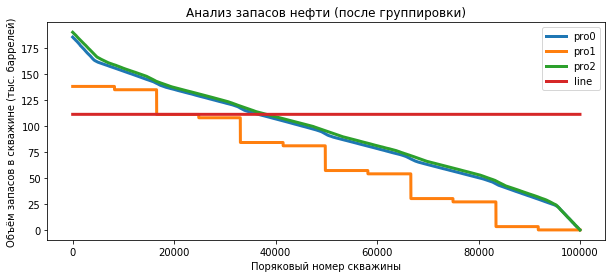

In [18]:
pro_df['line'] = BREAKEVEN_POINT

pro_df.reset_index().plot(x='index', y=['pro0', 'pro1', 'pro2', 'line'], linewidth=3, figsize = (10,4))
plt.title('Анализ запасов нефти (после группировки)')
plt.xlabel('Поряковый номер скважины')
plt.ylabel('Объём запасов в скважине (тыс. баррелей)');
plt.show()

Рассмотрим 200 независимых исходов событий.
<p> Если в каждом таком независимом исходе будет полученная скважина с значением запаса 111.1 (тыс. баррелей) или выше, то следствием будет прибыль, а не убыток.
<p> Пока отолкнемся от этой посылки попробуем оценить вероятность прибыли (количество хороших исходов), а риск убытков это остальное вероятностное пространство, один минус (вероятность получить прибыльный проект).

In [19]:
def test_1000(df): # функция расчета прибыли 1000 раз
    f_train, f_valid, t_train, t_valid = data(df) # вызов функции data
    model.fit(f_train,t_train) # обучение модели на тренировочной выборке
    predictions_valid = model.predict(f_valid) 
    
    values = [] # значение прибыли\убытка

    for _ in range(1000): # создаем тестовую выборку из 200 лучших скважин
        # создаем 500 случайных скважин
        df_predict_500 = pd.Series(predictions_valid).sample(500, random_state=state) 
        # вытащим 200 индексов лучших значений
        df_best_predict_200_index = df_predict_500.sort_values(ascending=False).head(200).index
        # сразу 200 лучших вызову по индексу (здесь не нужно 500 натуральных)
        df_best_valid_200 = t_valid.reset_index(drop=True)[df_best_predict_200_index] 
        values.append(df_best_valid_200.sum() * 450_000 - 10_000_000_000) 
    return pd.DataFrame(values)  

In [20]:
revenue_1000_0 = test_1000(df0)
revenue_1000_1 = test_1000(df1)
revenue_1000_2 = test_1000(df2)

revenue = pd.DataFrame()
revenue['0'] = revenue_1000_0
revenue['1'] = revenue_1000_1
revenue['2'] = revenue_1000_2

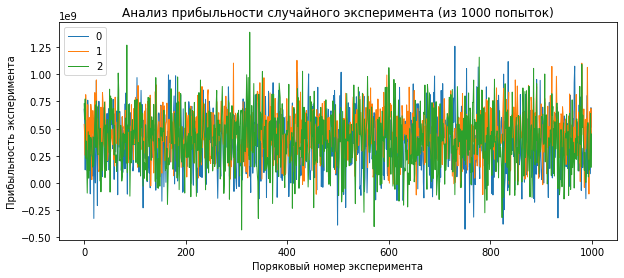

In [21]:
revenue.reset_index().plot(x='index', y=['0', '1', '2'], linewidth=1, figsize = (10,4))
plt.title('Анализ прибыльности случайного эксперимента (из 1000 попыток)')
plt.xlabel('Поряковый номер эксперимента')
plt.ylabel('Прибыльность эксперимента');
plt.show()

Попробуем выполнить сортировку и показать сколько было прибыльных случаев в регионе 1.

In [22]:
revenue_sort = pd.DataFrame()
revenue_sort['0'] = revenue_1000_0.sort_values(by=0, ascending=False).reset_index(drop=True)
revenue_sort['1'] = revenue_1000_1.sort_values(by=0, ascending=False).reset_index(drop=True)
revenue_sort['2'] = revenue_1000_2.sort_values(by=0, ascending=False).reset_index(drop=True)

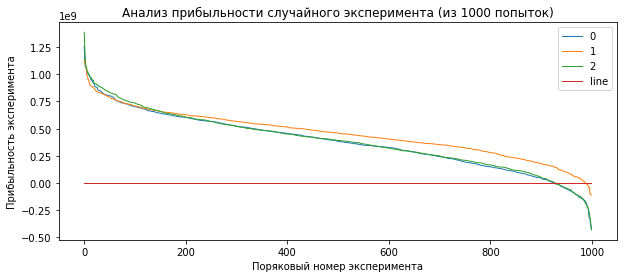

In [23]:
revenue_sort['line'] = 0
revenue_sort.reset_index().plot(x='index', y=['0', '1', '2', 'line'], linewidth=1, figsize = (10,4))
plt.title('Анализ прибыльности случайного эксперимента (из 1000 попыток)')
plt.xlabel('Поряковый номер эксперимента')
plt.ylabel('Прибыльность эксперимента');
plt.show()

In [24]:
def interval(df):
    revenue = df[0].mean()

    if  revenue > 0:
        print('Прибыльный регион')
        print('Cредняя прибыль {:.0f} руб.'.format(revenue))
    else:
        print('Убыточный регион')
        print('Убыток {:.0f} руб.'.format(revenue)) 
        
    print('95%-ый доверительный интервал полученного значения: ', 
          df.sort_values(by=0, ascending=False).quantile([0.025, 0.975]).values)
                   
    p1 = df[df[0] >= 0][0].count()/df.shape[0]
    print('Вероятность безубыточного проекта в регионе: {:.2f}'.format(p1))
    print('Вероятность (риск) убыточного проекта в регионе: {:.2f}'.format(1 - p1))
    print()
    print('______________________')
    print()

def interval_list(A):
    i = 0
    for x in A:
        print('Регион: ', i)
        i += 1
        interval(x) # вызов функции interval

In [25]:
revenue_1000 = [revenue_1000_0, revenue_1000_1, revenue_1000_2]
interval_list(revenue_1000)

Регион:  0
Прибыльный регион
Cредняя прибыль 380710891 руб.
95%-ый доверительный интервал полученного значения:  [[-1.26947638e+08]
 [ 8.79613968e+08]]
Вероятность безубыточного проекта в регионе: 0.93
Вероятность (риск) убыточного проекта в регионе: 0.07

______________________

Регион:  1
Прибыльный регион
Cредняя прибыль 454785435 руб.
95%-ый доверительный интервал полученного значения:  [[4.67300848e+07]
 [8.40213356e+08]]
Вероятность безубыточного проекта в регионе: 0.99
Вероятность (риск) убыточного проекта в регионе: 0.01

______________________

Регион:  2
Прибыльный регион
Cредняя прибыль 389217074 руб.
95%-ый доверительный интервал полученного значения:  [[-1.15609566e+08]
 [ 9.06512590e+08]]
Вероятность безубыточного проекта в регионе: 0.93
Вероятность (риск) убыточного проекта в регионе: 0.07

______________________



<b>Выводы:
<p>Обучены 3 модели на данных из трех разных регионов.
<p> Каждая модель "наугадывала" себе 1000 раз (исходя из значений признаков f0/f1/f2) по 200 лучших скважин методом bootstrep.
<p> Графическим методом визуализированы прибыльные эксперименты.
<p> Регион 1 имеет самый низкий риск убыточного проекта. К разработке месторождения рекомендован регион 1.